In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('dataset.csv')

In [50]:
df['Is_Man'] = df.Gender.astype('category').cat.codes

In [51]:
df.sample(5)

,Gender,Height,Weight,Is_Man
9654,Female,156.949440,61.522257,0
684,Male,173.425578,88.536591,1
8955,Female,156.657195,56.278132,0
4416,Male,182.398113,92.202130,1
4089,Male,172.909829,84.973719,1


In [37]:
#df = df.rename(index=str, columns={"Height (cm)": "Height", "Weight (kg)": "Weight"})

In [42]:
# df = df.drop(['Unnamed: 0'], axis=1)

In [44]:
# df.to_csv('dataset.csv', index=False)

In [47]:
df.shape

(10000, 3)

In [48]:
df.Gender.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

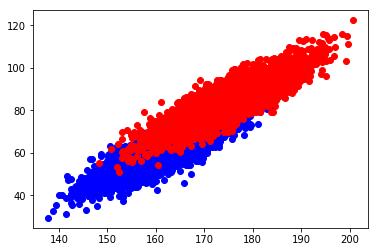

In [52]:
plt.plot(df[df.Gender == 'Female'].iloc[:,1], df[df.Gender == 'Female'].iloc[:,2], 'bo');
plt.plot(df[df.Gender == 'Male'].iloc[:,1], df[df.Gender == 'Male'].iloc[:,2], 'ro');

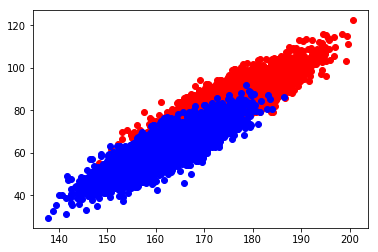

In [53]:
plt.plot(df[df.Gender == 'Male'].iloc[:,1], df[df.Gender == 'Male'].iloc[:,2], 'ro');
plt.plot(df[df.Gender == 'Female'].iloc[:,1], df[df.Gender == 'Female'].iloc[:,2], 'bo');

# LinearRegression

In [14]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, cross_val_score

In [15]:
lr = linear_model.LinearRegression()

In [59]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Height', 'Is_Man']], df.Weight, test_size=0.33, random_state=42)

In [89]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
X_test.head()

,Height,Is_Man
6252,174.465570,0
4684,174.826508,1
1731,168.651246,1
4742,182.700524,1
4521,170.288974,1


In [92]:
y_test.head()

6252    78.523948
4684    88.523941
1731    77.209274
4742    97.544805
4521    82.880989
Name: Weight, dtype: float64

In [94]:
y_pred = lr.predict(X_test)
y_pred[0:5]

array([75.08041477, 84.28300564, 77.71440439, 92.65856507, 79.45644871])

# [mean_squared_error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
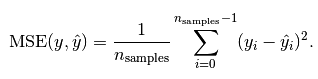

In [113]:
from sklearn.metrics import mean_squared_error
y_true_example = [3, -0.5, 2, 7]
y_pred_example = [2, 2.0, 2, 10]
mean_squared_error(y_true_example, y_pred_example)

4.0625

In [114]:
mean_squared_error(y_test, y_pred)

20.76520969799837

# [mean_absolute_error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)
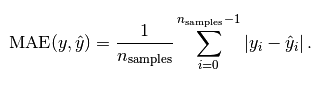

In [115]:
from sklearn.metrics import mean_absolute_error
y_true_example = [3, -0.5, 2, 7]
y_pred_example = [2, 2.0, 2, 10]
mean_absolute_error(y_true_example, y_pred_example)

1.625

In [116]:
mean_absolute_error(y_test, y_pred)

3.6084508462025284

# Кросс-валидация
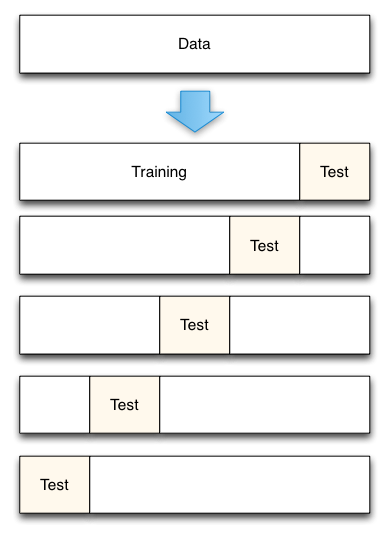

'найдите неточность на картинке'

In [125]:
cross_val_score(lr, df[['Height', 'Is_Man']], df.Weight, cv=5, scoring='neg_mean_absolute_error')

array([-3.69029408, -3.59227623, -3.60308406, -3.6340899 , -3.61107456])

# DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtc = DecisionTreeClassifier()

In [53]:
cross_val_score(dtc, df.iloc[:,1:3], df.Gender, cv=2)

array([0.8782, 0.8706])

In [54]:
dtc.fit(df.iloc[:,1:3], df.Gender)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
dtc.predict([[180,90]])

array(['Male'], dtype=object)

In [65]:
from sklearn import tree

In [69]:
graph = tree.export_graphviz(dtc)

In [71]:
dtcsmall = DecisionTreeClassifier(max_depth=3)

In [73]:
cross_val_score(dtcsmall, df.iloc[:,1:3], df.Gender, cv=10)

array([0.93 , 0.895, 0.927, 0.909, 0.903, 0.904, 0.91 , 0.916, 0.918,
       0.918])

In [84]:
df.columns[1:3]

Index(['Height (cm)', 'Weight (kg)'], dtype='object')

In [75]:
dtcsmall.fit(df.iloc[:,1:3], df.Gender)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
tree.export_graphviz(dtcsmall, out_file='dtcsmall.dot',
                    feature_names=df.columns[1:3],
                    class_names=['Male', 'Female'],
                    filled=True,
                    rounded=True,
                     special_characters=True
                    )
!dot -Tpng dtcsmall.dot -o dtcsmall.png
!dtcsmall.png

In [64]:
df[['Gender','Height (cm)']].head(2)

,Gender,Height (cm)
0,Male,187.571423
1,Male,174.706036
